In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

Будем работать с распределением $\chi ^ 2$. Такая случайная величина представляет собой сумму квадратов $k$ независимых нормальных случайных величин с параметрами $(0, 1)$, где $k$ - параметр распределения. В дальнейшем будем использовать $k = 10$.

# Часть 1
Для начала сгенерируем выборку из 1000 элементов. 

In [2]:
cnt_samples = 1000
k = 10

chi2_rv = sts.chi2(k)
samples = chi2_rv.rvs(cnt_samples)

Построим гистограмму этой выборки. Поверх наложим функцию плотности распределения.

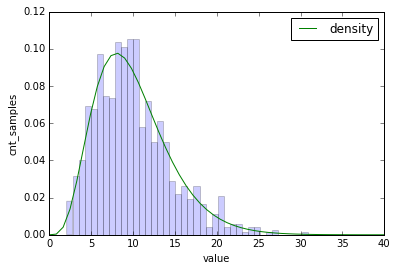

In [3]:
plt.hist(samples, bins=40, alpha=0.2, normed=True)
plt.ylabel('cnt_samples')
plt.xlabel('value')

x = np.linspace(0, 40)
pdf = chi2_rv.pdf(x)
plt.plot(x, pdf, label="density")

plt.legend()

plt.show()

По графику можем заметить, что гистограмма довольно успешно приближает реальную функцию распределения.

# Часть 2

Реализуем функцию, которая принимает на вход размер выборки $n$ и строит гистограмму их выборочных средних (накладывая поверх график плотности нормального распредления из ЦПТ).

Матожидание распределения $\chi^2$ равно $k$, дисперсия равна $2k$. Таким образом согласно ЦПТ аппроксимирующее нормальное распределение должно иметь параметры $(k, \frac{2k}{n})$ 

In [4]:
def calc_sample_mean(sample):
    mean = 0.
    for val in sample:
        mean += val
    return mean / len(sample)

def build_hist(n):
    cnt = 1000
    samples = [chi2_rv.rvs(n) for i in xrange(cnt)]
    sample_means = [calc_sample_mean(sample) for sample in samples]
    
    plt.title("n = " + str(n))
    
    plt.hist(sample_means, alpha=0.2, normed=True)
    plt.ylabel('cnt_samples')
    plt.xlabel('sample_mean')
    
    norm_rv = sts.norm(k, 2. * k / n)
    x = np.linspace(0, 20)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label="density")
    plt.legend()
    
    plt.show()

Теперь построим соответствующие графики для $n = 5, 10, 30$

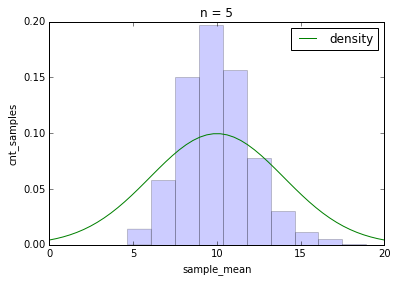

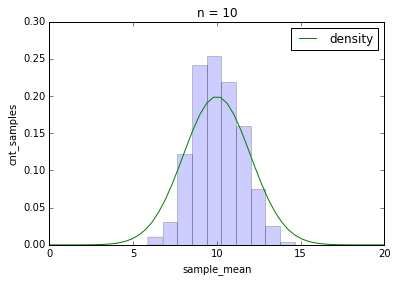

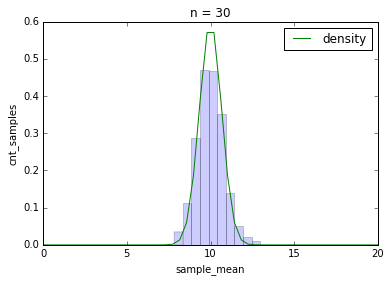

In [5]:
build_hist(5)
build_hist(10)
build_hist(30)

По получившимся графикам видно, что при росте размера выборки $n$ увеличивается и точность аппроксимации.

# Выводы
В результате выполнения работы было получено экспериментальное подтверждение того факта, что с помощью гистограммы, построенной по выборке, можно приблизить функцию плотности соответствующей случайной величины. 

Также на практике была проверена Центральная предельная теорема и установлена зависимость качества аппроксимации и числа элементов выборок.